**Import Pandas and Read Stock Data**

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("all_stocks_5yr.csv")

**Select Company Stock Data to Analyze**

In [3]:
#selecting emitens "GOOGL"
df1 = df[df.Name == 'GOOGL']

In [19]:
df.groupby('Name').size()

Name
A       1259
AAL     1259
AAP     1259
AAPL    1259
ABBV    1259
        ... 
XYL     1259
YUM     1259
ZBH     1259
ZION    1259
ZTS     1259
Length: 505, dtype: int64

In [4]:
df1

,date,open,high,low,close,volume,Name
250308,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
250309,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
250310,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
250311,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
250312,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL
...,...,...,...,...,...,...,...
251562,2018-02-01,1175.9900,1187.4500,1169.3600,1181.5900,3675709,GOOGL
251563,2018-02-02,1127.4200,1131.3000,1111.1700,1119.2000,5892122,GOOGL
251564,2018-02-05,1100.6100,1114.9900,1056.7400,1062.3900,4177469,GOOGL
251565,2018-02-06,1033.9800,1087.3800,1030.0100,1084.4300,3831524,GOOGL


**Split Train and Test Data**

In [5]:
#split train and test, train = 20% data
df1_train = df1.iloc[:1007]
df1_test = df1.iloc[1007:]

**Import Numpy and Matplotlib**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

**Building Training Set in Array Form**

In [7]:
training_set = df1_train.iloc[:,1:2].values

In [8]:
training_set

array([[390.4551],
       [389.5892],
       [391.2659],
       ...,
       [823.13  ],
       [820.92  ],
       [825.5   ]])

**Feature Scalling**

In [10]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

**Convert data into 3D dimension array**

In [11]:
#Convert data into 3D dimension array 
#(X_train samples, 60 timestamps, one feature at each step)
x_train = []
y_train = []
for i in range(60, 1007):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Input Keras Library**

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


**Build LSTM Model**

In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size =32)



Epoch 1/100
947/947 [==============================] - 14s 14ms/step - loss: 0.0558
Epoch 2/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0051
Epoch 3/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0033
Epoch 4/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0032
Epoch 5/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0031A: 2s 
Epoch 6/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0030
Epoch 7/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0028
Epoch 8/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0028
Epoch 9/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0026
Epoch 10/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0027
Epoch 11/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0024
Epoch 12/100
947/947 [==============================] - 5s 5ms/step - loss: 0.0022
Epoch

**Predicts Open Stock Price**

In [15]:
dataset_total = df1['open']
inputs = dataset_total[len(dataset_total) - len(df1_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
                          
X_test = []
for i in range(60, 312):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
                          

In [16]:
real_stock_price = df1_test['open'].values

**Plot Visualization**

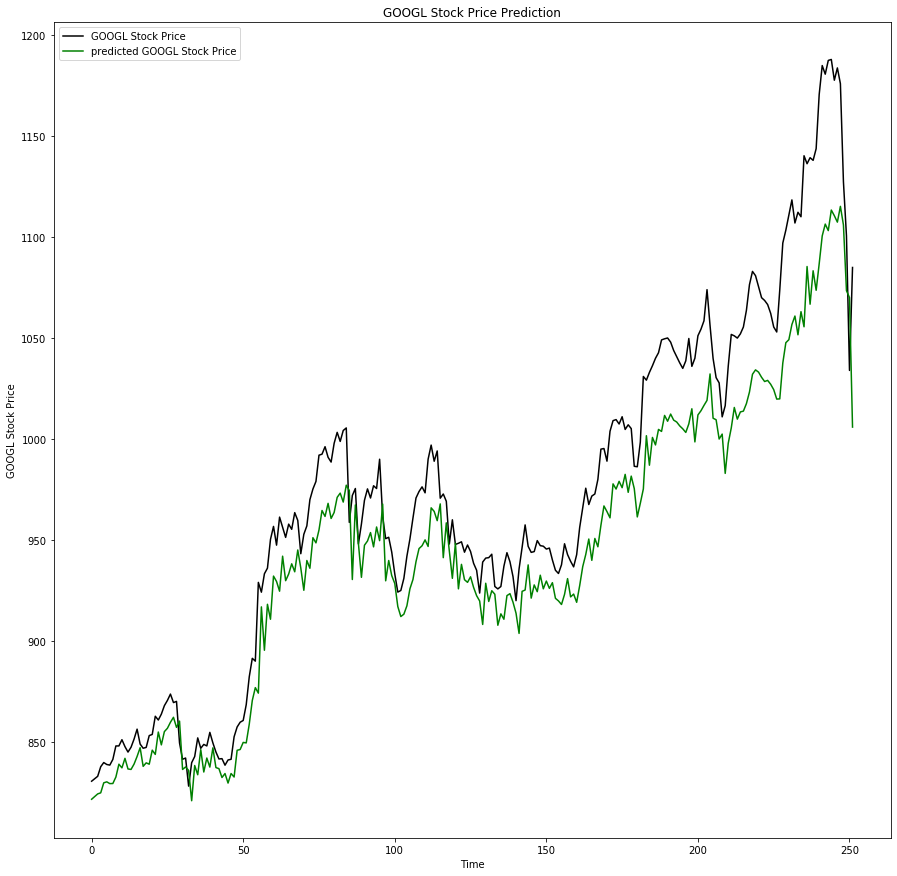

In [19]:
plt.figure(figsize=(15,15))
plt.plot(real_stock_price, color = 'black', label = 'GOOGL Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'predicted GOOGL Stock Price')
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOGL Stock Price')
plt.legend()
plt.show()
